In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif

In this file, we will contexualize K mean clustering and demonstrate why it's necessary to reduce features

In [2]:
# load data file
data = pd.read_csv('/home/DAVIDSON/jiqian/Workspace/IS/CancerBioInfo/Data Processing/data_processed.csv')

In [3]:
label = data['PATH_N_STAGE']

### Run ANOVA F-value

In [4]:
f_values, p_values = f_classif(data.iloc[:,1:],data['PATH_N_STAGE'])
f_pd = pd.DataFrame(f_values, columns = ['F-value'])

In [5]:
# create a new dataframe with the feature names and F-values
fnf = pd.DataFrame({'feature': data.iloc[:,1:].columns, 'F-value': f_values})

# sort the dataframe in descending order based on the F-values
sorted_fnf = fnf.sort_values('F-value', ascending=False)

columns = sorted_fnf['feature']

selected = data[columns]
data = selected
data["PATH_N_STAGE"] = label

### Split data into train set and test set

In [6]:
# Split the data into 80%/20%
data_train, data_test = train_test_split(data, test_size = 0.2, random_state=42)
data_train = data_train.reset_index(drop = True)
data_test = data_test.reset_index(drop = True)

In [7]:
X = data_train.iloc[:,:data.shape[1]-1]
y = data_train['PATH_N_STAGE']
X_test = data_test.iloc[:,:data.shape[1]-1]
y_test = data_test['PATH_N_STAGE']

### Run ANOVA F-value again

This move recalculate ANOVA F-value for all features so that the order of the features to include in the model best reflect difference between groups instead of within group.

In [8]:
f_values, p_values = f_classif(X,y)
f_pd = pd.DataFrame(f_values, columns = ['F-value'])

In [9]:
# create a new dataframe with the feature names and F-values
fnf = pd.DataFrame({'feature': X.columns, 'F-value': f_values})

# sort the dataframe in descending order based on the F-values
sorted_fnf = fnf.sort_values('F-value', ascending=False)

columns = sorted_fnf['feature']

selected = X[columns]
X = selected
X

,M_C16ORF91,M_CTNNAL1,M_MAP6D1,M_HIST1H2AK,M_ASH1L-AS1,M_HIST1H3J,M_SPATA46,M_GOLGA1,M_PRSS27,M_HIST1H2BN,...,M_RAD9A,M_RPA4,M_BBC3,M_HOTAIR,M_DUX4L6,M_KISS1R,M_KCNJ9,M_PIGL,M_LOC100129935,M_OR10G9
0,0.8792,-0.0361,-0.3510,-0.3868,0.0693,-0.2442,-0.6439,0.8551,0.1356,1.2886,...,0.4958,-0.2268,-0.2790,-0.1641,5.0093,-0.1309,3.4446,0.3162,-0.0489,-0.0504
1,1.1363,-0.2450,-0.2738,-0.1765,0.3303,0.3021,0.2213,0.1103,-0.0034,-0.7416,...,-0.4151,-0.1522,1.4193,2.6129,-0.1881,-0.2389,1.4233,-0.0742,-0.0489,-0.0504
2,-0.7364,-0.3339,-1.1468,-0.1550,0.1437,-0.6287,-0.6439,-0.7200,-0.2643,-0.3989,...,-0.2748,-0.1527,0.1968,-0.3996,-0.1881,-0.1954,-0.7553,-0.1914,-0.0489,-0.0504
3,-0.9999,-1.2376,-0.4907,-0.2636,-0.2875,-0.6287,3.5319,0.7420,0.0393,-1.5120,...,-0.3144,-0.5817,-0.6945,0.3986,-0.1881,-0.2389,0.7469,0.5225,-0.0489,-0.0504
4,2.6742,-0.2704,-0.6972,-0.7952,-0.2508,-0.6287,-0.6439,-0.4717,-0.6117,-0.6322,...,0.9930,0.0924,-0.6307,1.0482,-0.1881,-0.1363,-0.1854,-0.6224,-0.0489,-0.0504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,-1.3892,0.2992,-0.8179,-0.3634,-0.8512,-0.0060,0.5137,0.3913,-0.5895,-0.2057,...,-0.7982,-0.2943,-0.5631,-0.4145,-0.1881,-0.2098,-0.1075,-0.6982,-0.0489,-0.0504
329,-0.6168,-0.5563,0.1017,-0.1894,0.1920,-0.6287,0.3637,0.0425,0.3491,-0.9687,...,0.1278,-0.4566,-0.7463,0.1092,-0.1881,-0.2008,-0.3324,0.3953,-0.0489,-0.0504
330,0.8713,1.3086,0.9111,1.4000,1.0178,-0.1033,-0.6439,3.4720,0.5115,0.9060,...,1.6843,0.0245,-0.1362,-0.3681,3.3634,-0.0913,-0.7553,1.8720,-0.0489,-0.0504
331,-1.1250,1.3591,-0.6607,-0.1890,-0.9390,0.5643,1.0194,-0.5864,-0.4240,-0.0317,...,-1.1615,-0.4441,-0.6757,-0.4448,-0.1881,-0.2389,-0.7553,-0.8009,-0.0489,-0.0504


### Gaussian Naive Bayesian Classificaiton

Naive Bayesian Classificaiton is a probabilistic supervised classification method that could classify the different groups based on Bayes' theorem.

To find the best set of variables to drive supervised machine learning model, the paper used NB classification.

As it is shown in Fig. S1 from the paper. **The best results for K-means clustering were obtained with 1000-variables set.**

#### 1. NB classification for all features

In [10]:
gnb = GaussianNB()
gnb.fit(X, y)

GaussianNB()

In [11]:
# making predictions on the testing set
y_pred = cross_val_predict(gnb, X, y, cv=5)
y_pred_test = cross_val_predict(gnb, X_test, y_test, cv=5)

In [12]:
y_pred

array([2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1.,
       2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2.,
       2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2.,
       2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2.,
       2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2.,
       1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2.,
       2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1.,
       2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2.,
       2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [13]:
# comparing actual response values (y) with predicted response values (y_pred) using cross validation
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y, y_pred)*100)
print("Gaussian Naive Bayes model MCC:", matthews_corrcoef(y, y_pred))
# comparing actual response values (y) with predicted response values (y_pred) using cross validation
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_test)*100)
print("Gaussian Naive Bayes model MCC:", matthews_corrcoef(y_test, y_pred_test))

Gaussian Naive Bayes model accuracy(in %): 80.18018018018019
Gaussian Naive Bayes model MCC: 0.3608087157172645
Gaussian Naive Bayes model accuracy(in %): 70.23809523809523
Gaussian Naive Bayes model MCC: 0.21885688981825285


The MCC was too low using all the features

### 2. Find the optimal number of features for Gaussian NB

#### MCC

In [14]:
# This is a function that takes in the X,y,and total number of features to consider 
# and returns the MCC value using given amount of variables
def MCC_func(X_train,y_true,index):
    data_modeled = model.fit(X_train.iloc[:,0:index+1], y_true)
    #print(X_train.iloc[:,0:2])
    y_pred = data_modeled.predict(X_train.iloc[:,0:index+1])
    MCC = matthews_corrcoef(y_true, y_pred)
    return MCC

In [ ]:
model = GaussianNB()
MCC = []
i = 0
while i<=3500:
    score = MCC_func(X,y,i)
    MCC.append(score)
    i += 1

In [ ]:
index = list(range(0,3501))
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(index, MCC, '-o', markersize=5)
plt.xlabel('Number of Features', fontsize=14)
plt.ylabel('MCC score', fontsize=14)
plt.title('Relation between MCC score and Number of Features')
plt.show()

In [ ]:
MCC_pd = pd.DataFrame(MCC, columns = ['MCC'])
MCC_pd.sort_values(by = ['MCC'], ascending=[False]).iloc[:10,:]

In [ ]:
bestmany = MCC_pd['MCC'].idxmax()

Therefore, we conclude that the optimal MCC was reached with 1535 features. (There might be slight alteration due to ransom split of train/test dataset)

#### Accuracy

In [88]:
def accuracy_func (X_train,y_true,index):
    data_modeled = model.fit(X_train.iloc[:,0:index+1], y_true)
    y_pred = data_modeled.predict(X_train.iloc[:,0:index+1])
    accur = metrics.accuracy_score(y_true, y_pred)
    return accur

In [89]:
model = GaussianNB()
accuracy = []
i = 0
while i<= 3500:
    score = accuracy_func(X,y,i)
    accuracy.append(score)
    i += 1

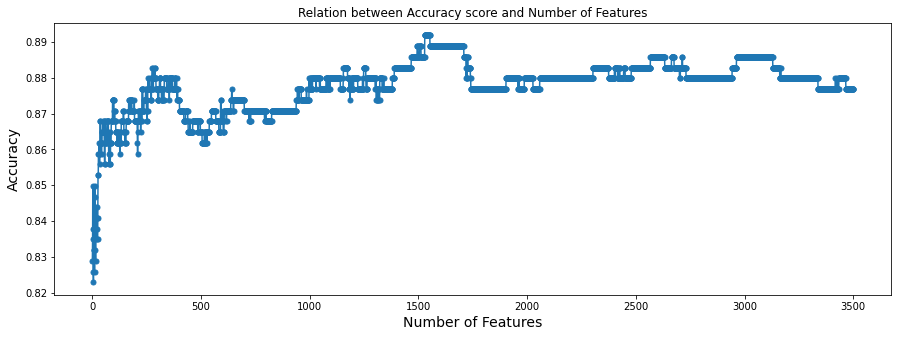

In [90]:
index = list(range(0,3501))
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(index, accuracy, '-o', markersize=5)
plt.xlabel('Number of Features', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Relation between Accuracy score and Number of Features')
plt.show()

In [91]:
accur_pd = pd.DataFrame(accuracy, columns = ['Accuracy'])
accur_pd.sort_values(by = ['Accuracy'], ascending=[False]).iloc[:10,:]

,Accuracy
1529,0.891892
1542,0.891892
1530,0.891892
1552,0.891892
1551,0.891892
1550,0.891892
1549,0.891892
1548,0.891892
1547,0.891892
1545,0.891892


#### Complie two graphs together

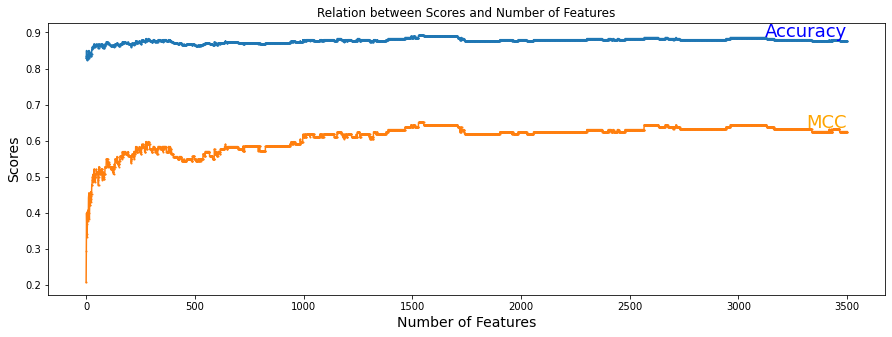

In [96]:
index = list(range(0,3501))
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(index, accuracy, '-o', markersize=1)
plt.plot(index, MCC, '-o', markersize=1)

plt.text(index[-1], accuracy[-1], 'Accuracy', ha='right', va='bottom', fontsize=18, color='blue')
plt.text(index[-1], MCC[-1], 'MCC', ha='right', va='bottom', fontsize=18, color='orange')

plt.xlabel('Number of Features', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Relation between Scores and Number of Features')
plt.show()
# Save the figure as a PNG file
fig.savefig('NB_Accu_MCC.png')

#### Confusion Matrix

In [93]:
y_pred_best = cross_val_predict(gnb, X.iloc[:,:bestmany], y, cv=5)

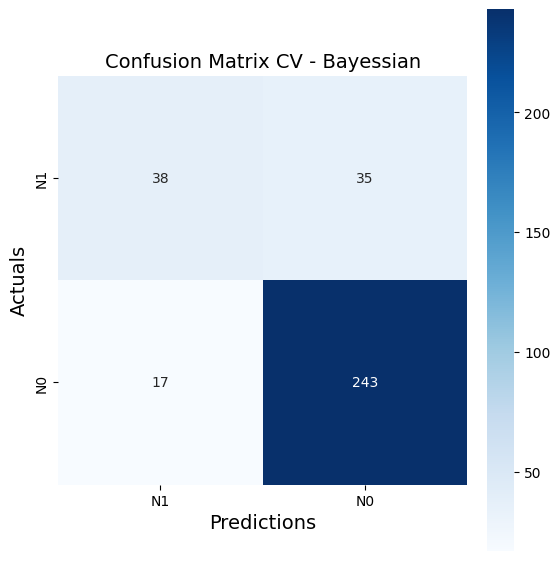

In [103]:
conf_matrix = confusion_matrix(y, y_pred_best, labels=[1.0, 2.0]).T 
fig, ax = plt.subplots(figsize=(5.5, 5.5), dpi=100, facecolor='w', edgecolor='k', constrained_layout=True, subplot_kw=dict(aspect='equal'))
class_names = ['N1','N0']
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names, ax=ax)
ax.set_xlabel('Predictions', fontsize=14)
ax.set_ylabel('Actuals', fontsize=14)
ax.set_title('Confusion Matrix CV - Bayessian', fontsize=14)
plt.show()
# Save the figure as a PNG file
fig.savefig('NB_Confusion Matrix CV.png')

The confusion matrix of the training set indicates well prediction on TN (N0) labels. However, prediction on TP (N1) is not as good.

In [98]:
y_pred_test = cross_val_predict(gnb, data_test.iloc[:,:bestmany], data_test['PATH_N_STAGE'], cv=5)

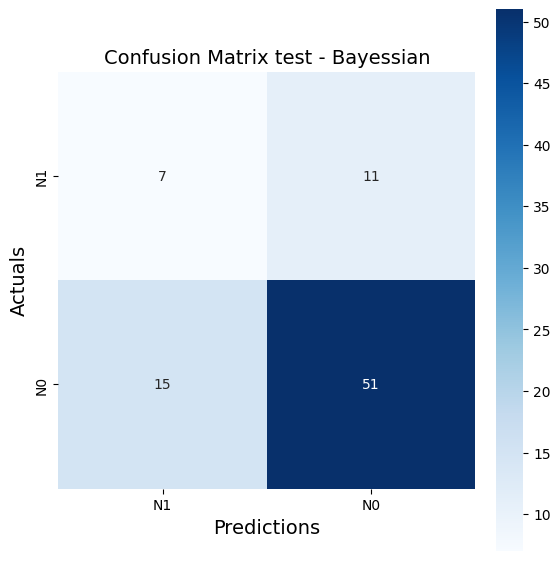

In [102]:
conf_matrix = confusion_matrix(data_test['PATH_N_STAGE'], y_pred_test, labels=[1.0, 2.0]).T 
fig, ax = plt.subplots(figsize=(5.5, 5.5), dpi=100, facecolor='w', edgecolor='k', constrained_layout=True, subplot_kw=dict(aspect='equal'))
class_names = ['N1','N0']
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names, ax=ax)
ax.set_xlabel('Predictions', fontsize=14)
ax.set_ylabel('Actuals', fontsize=14)
ax.set_title('Confusion Matrix test - Bayessian', fontsize=14)
plt.show()
fig.savefig('NB_Confusion Matrix test.png')

The problem on lack of ability to predict TP (N1) is even more significant in test set.